<a href="https://colab.research.google.com/github/janjuatest/Public-Sector/blob/main/Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfwho=pd.read_csv('WHO.csv')

Lets read the latest Corona data from WHO
File can be downloaded from the WHO Covid 19 website as a CSV

In [4]:
dfwho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Name                                                238 non-null    object 
 1   WHO Region                                          237 non-null    object 
 2   Cases - cumulative total                            238 non-null    int64  
 3   Cases - cumulative total per 1 million population   237 non-null    float64
 4   Cases - newly reported in last 7 days               238 non-null    int64  
 5   Cases - newly reported in last 24 hours             238 non-null    int64  
 6   Deaths - cumulative total                           238 non-null    int64  
 7   Deaths - cumulative total per 1 million population  237 non-null    float64
 8   Deaths - newly reported in last 7 days              238 non-null    int64  
 9  

In [5]:
dfwho.columns=['Country','Region','TotalCases','TotalCasesM','Cases7','Cases24h','DeathsT','DeathsTM','Death7','Deaths24h','Class']

Renaming the columns so that they are more readable

In [ ]:
dfwho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      238 non-null    object 
 1   Region       237 non-null    object 
 2   TotalCases   238 non-null    int64  
 3   TotalCasesM  237 non-null    float64
 4   Cases7       238 non-null    int64  
 5   Cases24h     238 non-null    int64  
 6   DeathsT      238 non-null    int64  
 7   DeathsTM     237 non-null    float64
 8   Death7       238 non-null    int64  
 9   Deaths24h    238 non-null    int64  
 10  Class        237 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 20.6+ KB


In [ ]:
dfwho['Country']=='Pakistan')

1

In [6]:
dfwhoSorted=dfwho.sort_values('DeathsTM',ascending=False)

In [9]:
dfwhoSorted.head(50)

,Country,Region,TotalCases,TotalCasesM,Cases7,Cases24h,DeathsT,DeathsTM,Death7,Deaths24h,Class
162,Gibraltar,Europe,4170,123771.93,74,7,80,2374.52,7,1,Clusters of cases
166,San Marino,Europe,3136,92403.80,111,9,69,2033.12,2,0,Community transmission
62,Slovenia,Europe,173702,83553.24,7229,501,3892,1872.11,140,14,Clusters of cases
26,Belgium,Europe,723870,62458.46,12650,0,21352,1842.34,238,0,Community transmission
5,The United Kingdom,Europe,3929839,57888.79,133747,18262,112092,1651.18,6521,828,Community transmission
20,Czechia,Europe,1034975,96645.52,50201,4863,17235,1609.40,927,106,Community transmission
8,Italy,Europe,2625098,43417.44,83315,13439,91003,1505.13,2724,385,Clusters of cases
77,Bosnia and Herzegovina,Europe,123704,37705.22,1813,270,4791,1460.31,95,16,Community transmission
84,North Macedonia,Europe,94599,45406.50,2081,403,2916,1399.65,68,8,Community transmission
1,United States of America,Americas,26547977,80204.73,871365,129961,455735,1376.83,22562,3549,Community transmission


Sort the dataframe with highest number of deaths per capita

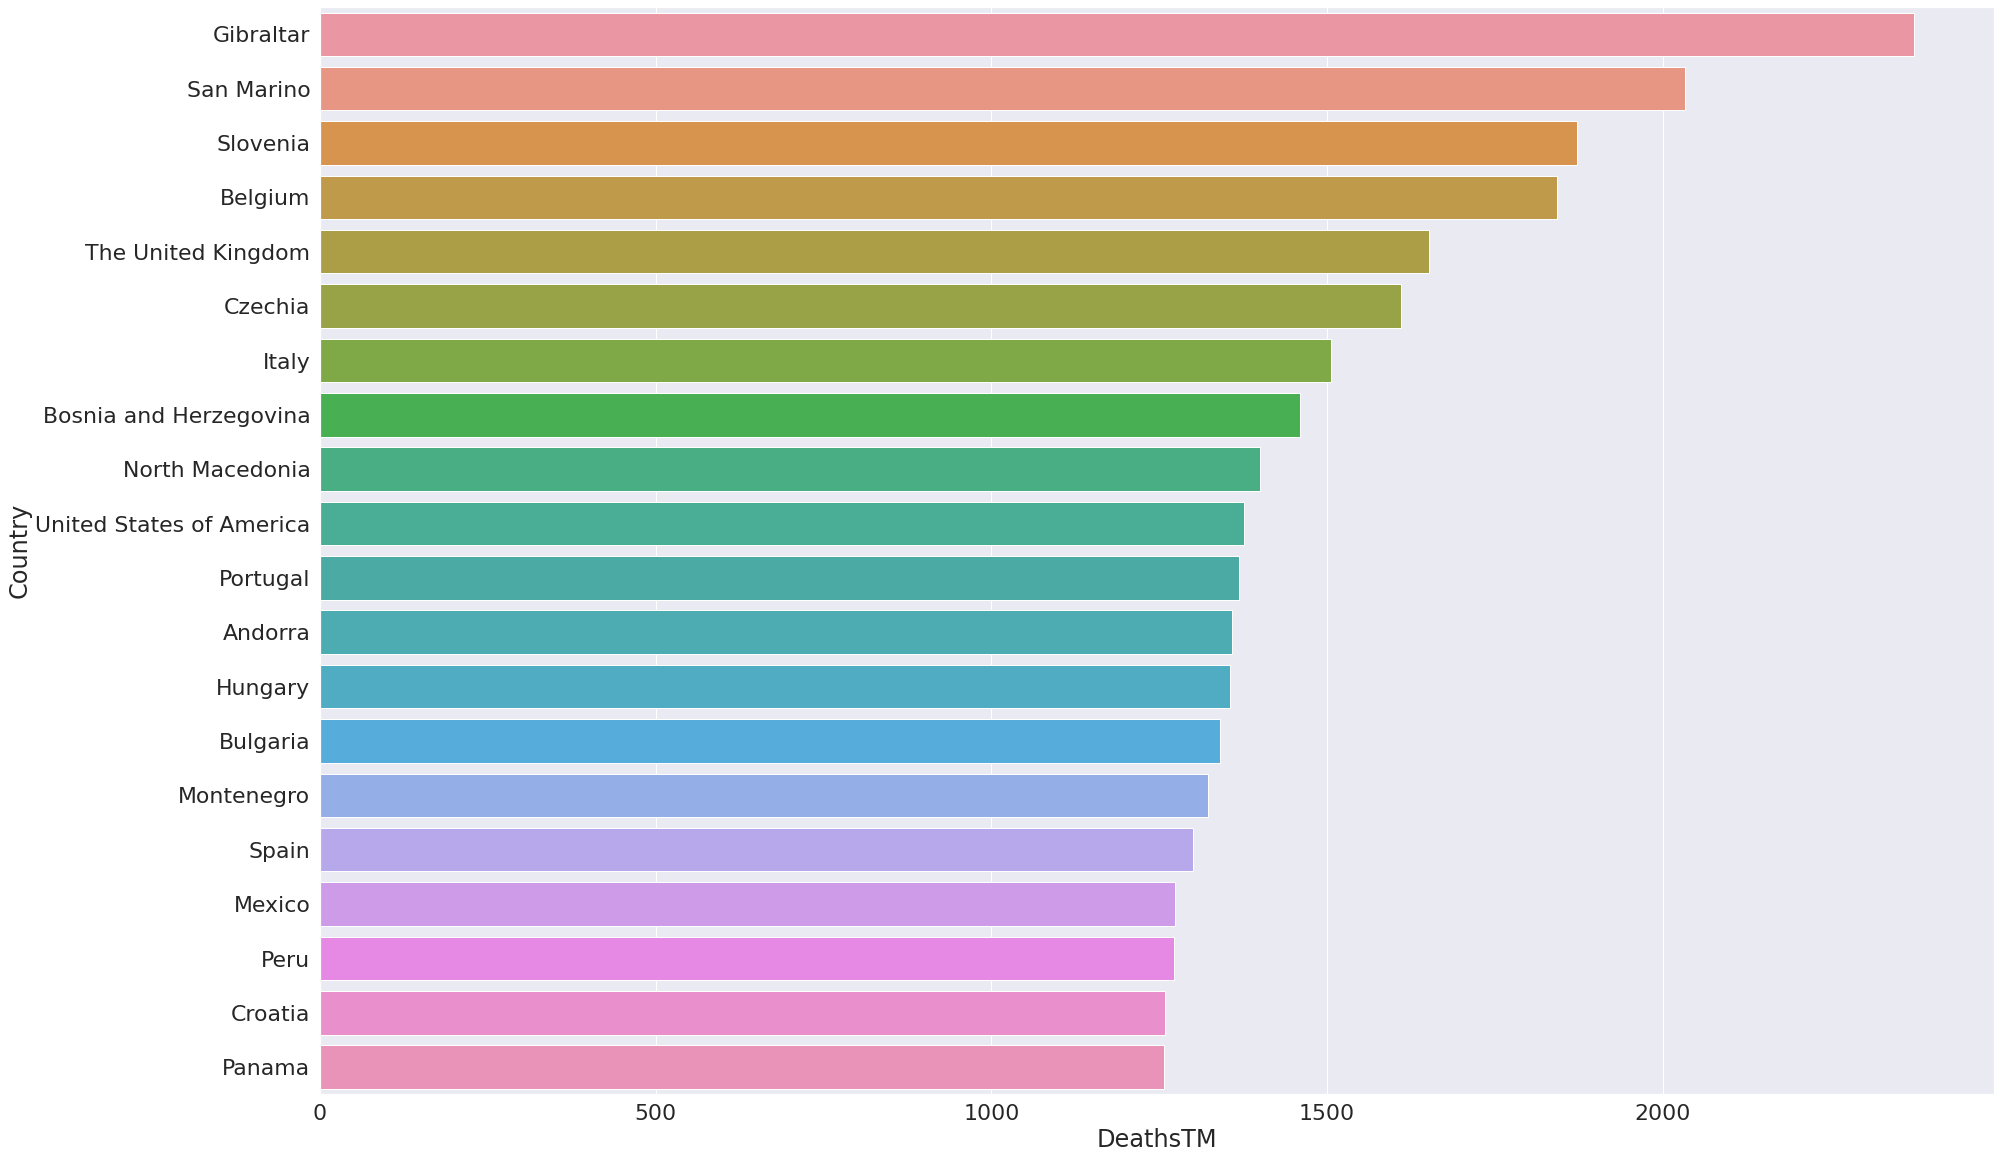

In [57]:
plt.figure(figsize=(30,20))
sns. set(font_scale=2)
bar=sns.barplot(data=dfwhoSorted.head(20),y='Country',x='DeathsTM')


In [13]:
!pip install -U wbdata

In [14]:
import wbdata,datetime

In [ ]:
wbdata.get_country("USA")

id    name
----  -------------
USA   United States

In [15]:
countries = [i['id'] for i in wbdata.get_country()] 

In [ ]:
len(countries)

297

In [16]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"SP.POP.DPND":"PopDep","IC.BUS.EASE.XQ": "EaseofB","NY.GDP.PCAP.PP.CD":"GDPpppPC","SH.STA.DIAB.ZS":"DiabetesPrev","SP.POP.GROW":"PopGrowth","SP.URB.TOTL.IN.ZS":"UrbanPop"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df1=pd.concat([wbdf1,wbdf2],axis=0)

In [18]:
df1.sort_values("EaseofB")

,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop
country,,,,,,
New Zealand,55.184478,1.0,45382.123508,6.200000,1.557728,86.615000
Singapore,32.845591,2.0,101649.074863,5.500000,1.144283,100.000000
"Hong Kong SAR, China",42.500808,3.0,62495.959940,4.500000,0.754095,100.000000
Denmark,57.149220,4.0,62089.914464,8.300000,0.429153,87.994000
"Korea, Rep.",38.516858,5.0,44011.231513,6.900000,0.198353,81.430000
...,...,...,...,...,...,...
Tuvalu,NaN,NaN,4470.857688,22.100000,1.192033,63.215000
Upper middle income,45.260279,NaN,17570.290540,9.001465,0.639904,66.351707
British Virgin Islands,NaN,NaN,NaN,14.200000,0.762138,48.116000


In [ ]:
data_date = datetime.datetime(2016, 1,1), datetime.datetime(2016, 1, 1)
indicator1={"SE.XPD.TOTL.GD.ZS":"GexpEdu","MS.MIL.XPND.GD.ZS": "MilExpGdp","SH.MED.PHYS.ZS":"HosBedP1000","SP.DYN.LE00.IN":"LifeExp"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df2=pd.concat([wbdf1,wbdf2],axis=0)

In [ ]:
wbdf=pd.concat([df1,df2],axis=1)

In [ ]:
wbdf.isnull().sum()

PopDep           25
EaseofB          75
GDPpppPC         32
DiabetesPrev      8
PopGrowth         2
UrbanPop          4
GexpEdu         122
MilExpGdp        71
HosBedP1000     151
LifeExp          17
dtype: int64

In [ ]:
wbdf.reset_index(inplace=True)

In [ ]:
wbdf

,country,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp
0,Aruba,46.367454,NaN,NaN,11.6,0.442122,43.546,5.52415,NaN,NaN,75.868000
1,Afghanistan,82.109775,173.0,2156.419482,9.2,2.311817,25.754,4.22836,0.956772,0.2782,63.763000
2,Angola,95.394042,177.0,6965.511374,4.5,3.242983,66.177,NaN,2.733341,NaN,59.925000
3,Albania,46.203522,82.0,14496.127683,9.0,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000
4,Andorra,NaN,NaN,NaN,7.7,0.176454,87.984,3.23707,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,NaN,57.0,11870.797576,NaN,-0.157992,NaN,NaN,0.773671,NaN,71.646341
259,"Yemen, Rep.",72.787716,187.0,NaN,5.4,2.300580,37.273,NaN,NaN,NaN,66.087000
260,South Africa,52.400879,84.0,13034.164661,12.7,1.338617,66.856,5.94285,1.075530,0.7997,63.153000
261,Zambia,87.188180,85.0,3624.024939,4.5,2.892373,44.072,3.74792,1.429305,0.1628,62.464000


In [ ]:
wbdf['deaths']=0

In [ ]:
dfwho['Country'][3]


'Brazil'

In [ ]:
  wbdf[wbdf['country']==dfwho['Country'][4]]['deaths']=10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in dfwho.index:
  deathsTM=dfwho.iloc[i]['DeathsTM']
  country=dfwho['Country'][i]
  wbdf.loc[wbdf['country']==country,'deaths']=deathsTM
  if ((wbdf['country']==country).sum()==0):
    print(country)
  #print(dfwho['Country'][i],deathsTM)

Global
United States of America
The United Kingdom
Iran (Islamic Republic of)
Czechia
Slovakia
Bolivia (Plurinational State of)
occupied Palestinian territory, including east Jerusalem
Slovenia
Egypt
Republic of Moldova
Venezuela (Bolivarian Republic of)
Kyrgyzstan
Republic of Korea
Kosovo[1]
Côte d’Ivoire
Democratic Republic of the Congo
French Guiana
Mayotte
Réunion
Guadeloupe
Bahamas
Congo
Martinique
Curaçao
Gambia
Jersey
United States Virgin Islands
Yemen
Viet Nam
Sint Maarten
Saint Lucia
Saint Martin
Saint Vincent and the Grenadines
Other
Guernsey
United Republic of Tanzania
Saint Barthélemy
Bonaire
Northern Mariana Islands (Commonwealth of the)
Lao People's Democratic Republic
Falkland Islands (Malvinas)
Saint Kitts and Nevis
Holy See
Saint Pierre and Miquelon
Sint Eustatius
Anguilla
Montserrat
Saba
Wallis and Futuna
Cook Islands
Democratic People's Republic of Korea
Micronesia (Federated States of)
Niue
Pitcairn Islands
Saint Helena
Tokelau


In [ ]:
dfwho[dfwho['Country'].str.contains("Timor")]

,Country,Region,TotalCases,TotalCasesM,Cases7,Cases24h,DeathsT,DeathsTM,Death7,Deaths24h,Class
206,Timor-Leste,South-East Asia,80,60.68,10,0,0,0.0,0,0,Sporadic cases


In [ ]:
wbdf.loc[wbdf['country'].str.contains("Kosovo"),'deaths']=811.66


In [ ]:
wbdf[wbdf['country'].str.contains("Kosovo")]

,country,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,deaths
258,Kosovo,NaN,57.0,11870.797576,NaN,-0.157992,NaN,NaN,0.773671,NaN,71.646341,811.66


In [ ]:
wbdf.drop(index=153,axis=0,inplace=True)

In [ ]:
wbdf.isnull().sum()

country           0
PopDep           25
EaseofB          75
GDPpppPC         32
DiabetesPrev      8
PopGrowth         2
UrbanPop          4
GexpEdu         122
MilExpGdp        71
HosBedP1000     151
LifeExp          17
deaths            0
dtype: int64

In [ ]:
(wbdf == 0).astype(int).sum(axis=0)

country          0
PopDep           0
EaseofB          0
GDPpppPC         0
DiabetesPrev     0
PopGrowth        0
UrbanPop         0
GexpEdu          0
MilExpGdp        3
HosBedP1000      0
LifeExp          0
deaths          82
dtype: int64

In [ ]:
wbdf=pd.read_csv("wbdf.csv")

In [ ]:
wbdf.head()

,Unnamed: 0,country,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,deaths
0,0,Aruba,46.367454,NaN,NaN,11.6,0.442122,43.546,5.52415,NaN,NaN,75.868,571.34
1,1,Afghanistan,82.109775,173.0,2156.419482,9.2,2.311817,25.754,4.22836,0.956772,0.2782,63.763,61.91
2,2,Angola,95.394042,177.0,6965.511374,4.5,3.242983,66.177,NaN,2.733341,NaN,59.925,14.45
3,3,Albania,46.203522,82.0,14496.127683,9.0,-0.426007,61.229,3.96209,1.103581,1.2164,78.194,502.47
4,4,Andorra,NaN,NaN,NaN,7.7,0.176454,87.984,3.23707,NaN,NaN,NaN,1358.96


In [ ]:
wbdf.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
wbdf[wbdf['deaths']==0].sort_values('UrbanPop').head(80)

,country,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,deaths
257,Samoa,74.816622,98.0,6795.684073,9.200000,0.491829,18.056000,4.162220,NaN,0.3445,72.895000,0.0
77,"Micronesia, Fed. Sts.",55.395811,158.0,NaN,11.900000,1.037743,22.812000,NaN,NaN,NaN,67.471000,0.0
236,Tonga,69.534039,103.0,6665.749949,15.700000,1.248987,23.107000,NaN,NaN,NaN,70.607000,0.0
121,Cambodia,55.804412,144.0,4583.016451,6.400000,1.446393,23.805000,NaN,1.909360,NaN,68.977000,0.0
207,Solomon Islands,77.815740,136.0,2780.637751,19.000000,2.565385,24.210000,NaN,NaN,0.1937,72.424000,0.0
255,Vanuatu,73.390305,107.0,3292.544065,11.900000,2.430920,25.394000,NaN,NaN,0.1653,70.021000,0.0
123,St. Kitts and Nevis,NaN,139.0,27608.134993,13.300000,0.752340,30.799000,NaN,NaN,NaN,NaN,0.0
36,Channel Islands,48.519623,NaN,NaN,3.900000,1.026973,30.931000,NaN,NaN,NaN,82.600000,0.0
234,Timor-Leste,71.170204,181.0,3709.811270,6.700000,1.963836,30.947000,8.051940,0.969826,NaN,68.735000,0.0
134,Low income,83.234426,NaN,2506.922436,6.393279,2.629610,33.318266,3.025340,1.386331,NaN,62.758637,0.0


In [ ]:
pd.options.display.max_rows = 999

In [ ]:
dfWBWHO=wbdf[wbdf['deaths']!=0]

In [ ]:
dfWBWHO.reset_index(inplace=True)

In [ ]:
dfWBWHO.drop("index",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
from google.colab import files

In [ ]:
dfWBWHO.to_csv('dfWbWho.csv')

In [ ]:
files.download('dfWbWho.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
dfWbWho=pd.read_csv('dfWbWho.csv')

In [11]:
dfWbWho.head()

,Unnamed: 0,country,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,deaths
0,0,Aruba,46.367454,NaN,NaN,11.6,0.442122,43.546,5.52415,NaN,NaN,75.868,571.34
1,1,Afghanistan,82.109775,173.0,2156.419482,9.2,2.311817,25.754,4.22836,0.956772,0.2782,63.763,61.91
2,2,Angola,95.394042,177.0,6965.511374,4.5,3.242983,66.177,NaN,2.733341,NaN,59.925,14.45
3,3,Albania,46.203522,82.0,14496.127683,9.0,-0.426007,61.229,3.96209,1.103581,1.2164,78.194,502.47
4,4,Andorra,NaN,NaN,NaN,7.7,0.176454,87.984,3.23707,NaN,NaN,NaN,1358.96


In [23]:
dfWbWho.sort_values("EaseofB")[['country','EaseofB','deaths']].head(30)

,country,EaseofB,deaths
131,New Zealand,1.0,5.18
150,Singapore,2.0,4.96
49,Denmark,4.0,382.41
95,"Korea, Rep.",5.0,28.69
176,United States,6.0,1376.83
64,Georgia,7.0,822.98
63,United Kingdom,8.0,1651.18
129,Norway,9.0,107.36
160,Sweden,10.0,1199.59
104,Lithuania,11.0,1078.87


In [ ]:
dfWBWHO.corrwith(dfWBWHO['deaths'],axis=0)

PopDep         -0.302671
EaseofB        -0.436250
GDPpppPC        0.355147
DiabetesPrev   -0.020298
PopGrowth      -0.480993
UrbanPop        0.398103
GexpEdu         0.187636
MilExpGdp      -0.104677
HosBedP1000     0.519770
LifeExp         0.506314
deaths          1.000000
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

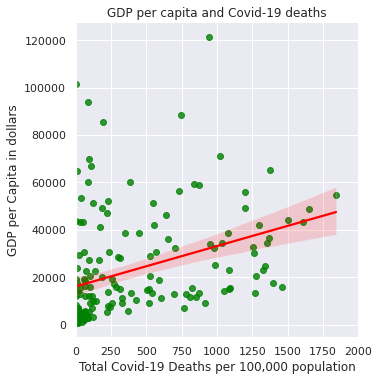

In [56]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=dfWbWho,y='GDPpppPC',x='deaths',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('GDP per capita and Covid-19 deaths')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('GDP per Capita in dollars')
axes=lm.axes
axes[0,0].set_xlim(0,2000)
lm.savefig("output2.png")
files.download("output2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

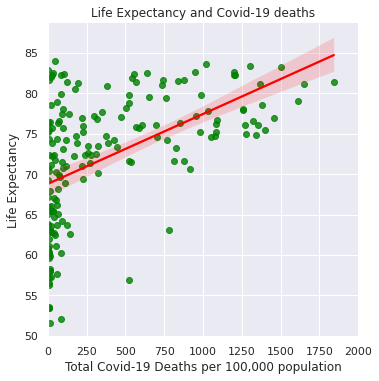

In [58]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=dfWbWho,y='LifeExp',x='deaths',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Life Expectancy and Covid-19 deaths')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('Life Expectancy')
axes=lm.axes
axes[0,0].set_xlim(0,2000)
lm.savefig("output1.png")
files.download("output1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

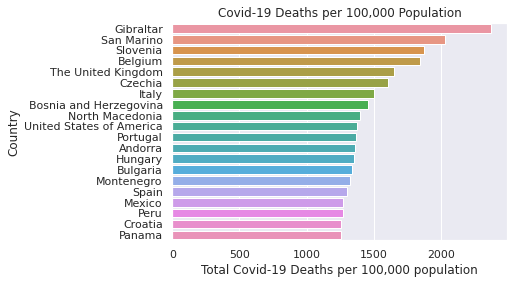

In [63]:
sns.set(style = "darkgrid")
plot=sns.barplot(data=dfwhoSorted.head(20),y='Country',x='DeathsTM')
plt.title('Covid-19 Deaths per 100,000 Population')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('Country')
plot.figure.savefig("output3.png")
files.download("output3.png")

